<a href="https://colab.research.google.com/github/diofares/LLM-Estatistica-Atividade1/blob/main/LLM_Estatistica_Atividade1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Parte 1: Z-score and Binomial Distribution

##A - Busque um dataset e faça histogramas de duas features para cada classe no dataset, conforme procedimento mostrado em sala. Faça dois conjuntos de histogramas com tamanhos de bins diferentes. Discuta os histogramas do ponto de vista de classificação usando aprendizado de máquina e também discuta os tamanhos dos bins usados. Não esqueça do contexto sobre o dataset usado, com a explicação sobre ele, suas classes e features.

###O dataset usado é o Heart Disease Dataset. A ideia dele é prever se uma pessoa tem doença cardíaca (1) ou não tem (0) usando vários dados médicos. Para esta parte da análise, olhamos só para duas variáveis numéricas:

* oldpeak: Depressão do segmento ST induzida por exercício em relação ao repouso. É uma medida numérica contínua, onde o valor 0 é muito frequente (indica normalidade no ECG).

* thalach: Frequência cardíaca máxima alcançada (Maximum Heart Rate). É uma variável contínua que mede o pico de batimentos durante o teste de esforço.

###Feature "oldpeak":

* Sem Doença: os valores são mais variados. Apesar de muitos estarem no zero, existe uma “cauda” que vai até valores como 4, 5 ou 6.

* Com Doença: quase todos os valores ficam em 0 ou muito perto disso. Quase não aparecem registros acima de 2.

###Feature "thalach":

* Sem Doença: o pico do histograma fica em valores mais baixos, algo perto de 130–150 bpm.

* Com Doença: o pico é mais a direita, perto de 160–170 bpm, indicando frequências mais altas.

###O que isso significa para Machine Learning: oldpeak é uma feature muito forte para separar as classes: valores acima de 2 praticamente indicam “Sem Doença”, algo que uma Árvore de Decisão detectaria facilmente. Já o thalach apresenta médias diferentes entre as classes, o que ajuda modelos probabilísticos (como Regressão Logística ou Naive Bayes) a distinguir os grupos mesmo com alguma sobreposição.

Using Colab cache for faster access to the 'heart-disease-dataset' dataset.


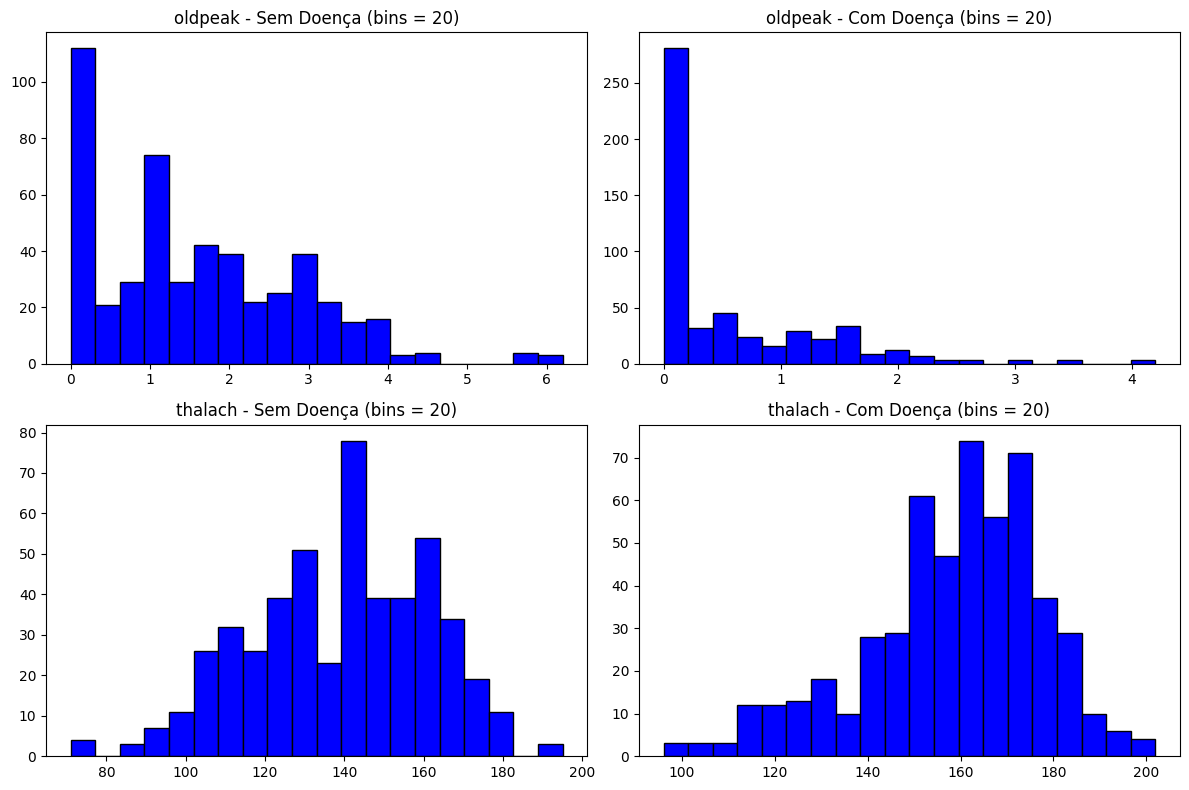

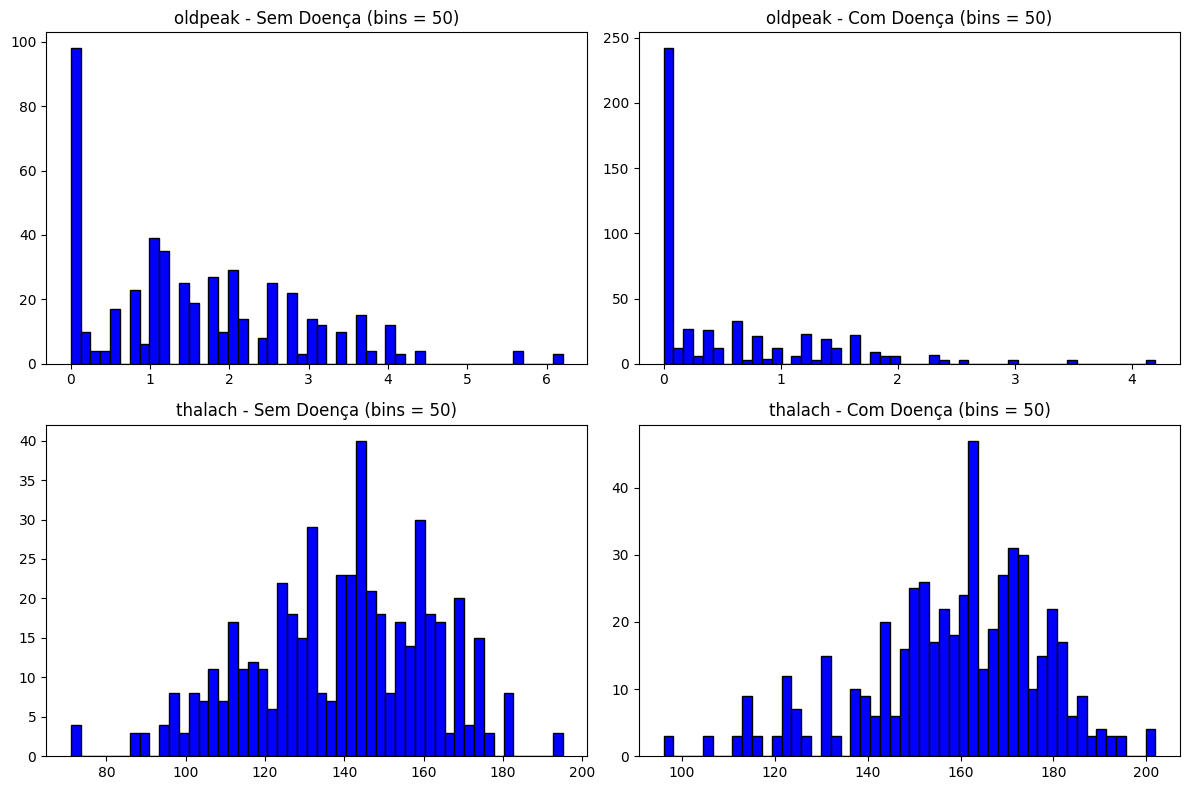

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import kagglehub

path = kagglehub.dataset_download("johnsmith88/heart-disease-dataset")
csv_path = path + "/heart.csv"
df_coracao = pd.read_csv(csv_path)

df_coracao["target"] = df_coracao["target"].map({0: "Sem Doença", 1: "Com Doença"})
features_analise = ["oldpeak", "thalach"]
grupos = ["Sem Doença", "Com Doença"]

def plotar_histogramas(df, grupos, features, num_bins):
  linhas = len(features)
  colunas = len(grupos)

  fig, matriz = plt.subplots(linhas, colunas, figsize=(12, 8))

  for i, feat in enumerate(features):
    for j, grupo in enumerate(grupos):
      subset = df[df["target"] == grupo][feat]
      matriz[i][j].hist(subset, bins=num_bins, color="blue", edgecolor="black")
      matriz[i][j].set_title(f"{feat} - {grupo} (bins = {num_bins})")

  plt.tight_layout()
  plt.show()

plotar_histogramas(df_coracao, grupos, features_analise, num_bins = 20)
plotar_histogramas(df_coracao, grupos, features_analise, num_bins = 50)

##B - Considerando o primeiro trabalho, defina um experimento em que dados são coletados de uma variável de interesse do seu trabalho. Produza dados artificiais, plote o histograma e a distribuição que aproxime os dados. Em seguida, defina estudos como o exemplo da pizza explicado em sala, sempre partido da versão não padronizada e depois os cálculos na versão padronizada.  Sempre considerando o contexto do seu primeiro trabalho. Use uma função de Python e uma tabela para obter os valores de probabilidade.


Using Colab cache for faster access to the 'heart-disease-dataset' dataset.


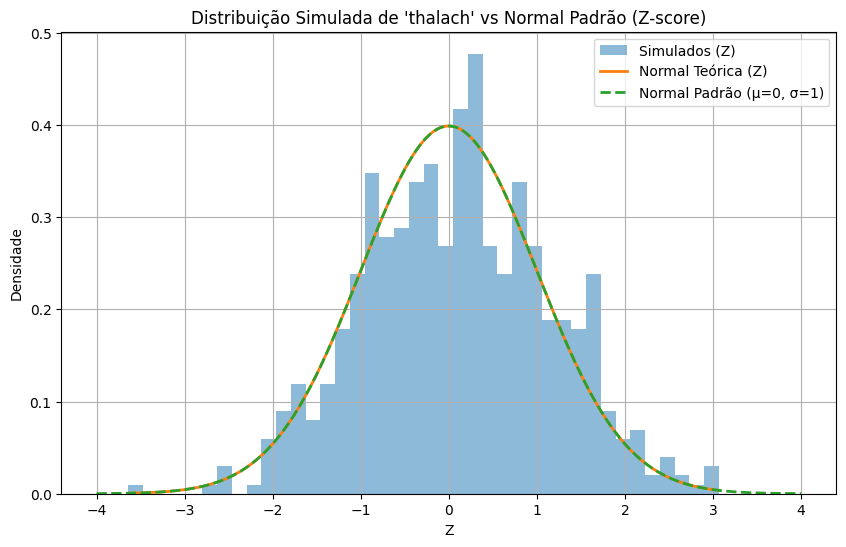

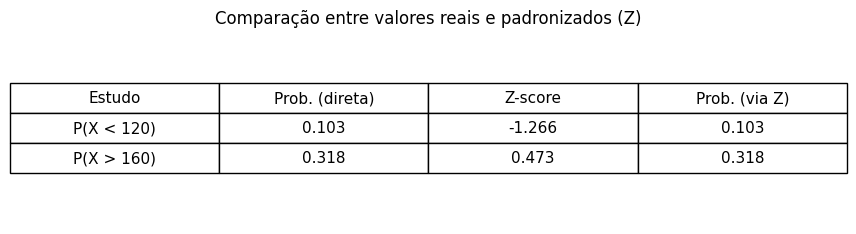

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import kagglehub

path = kagglehub.dataset_download("johnsmith88/heart-disease-dataset")
df_coracao = pd.read_csv(path + "/heart.csv")

variavel = df_coracao["thalach"].dropna()
mu = variavel.mean()
sd = variavel.std()
simulados = np.random.normal(mu, sd, 600)

simulados_z = (simulados - mu) / sd
x_axis_z = (np.linspace(simulados.min(), simulados.max(), 300) - mu) / sd
z_range = np.linspace(-4, 4, 400)
normal_padrao = norm.pdf(z_range)

plt.figure(figsize=(10,6))
plt.hist(simulados_z, bins=40, density=True, alpha=0.5, label="Simulados (Z)")
plt.plot(x_axis_z, norm.pdf(x_axis_z, 0, 1), linewidth=2, label="Normal Teórica (Z)")
plt.plot(z_range, normal_padrao, linewidth=2, linestyle="--", label="Normal Padrão (µ=0, σ=1)")
plt.title("Distribuição Simulada de 'thalach' vs Normal Padrão (Z-score)")
plt.xlabel("Z")
plt.ylabel("Densidade")
plt.legend()
plt.grid(True)
plt.show()

lim1 = 120
p1 = norm.cdf(lim1, mu, sd)
z1 = (lim1 - mu) / sd
p1_z = norm.cdf(z1)
lim2 = 160
p2 = 1 - norm.cdf(lim2, mu, sd)
z2 = (lim2 - mu) / sd
p2_z = 1 - norm.cdf(z2)

df_resumo = pd.DataFrame({"Estudo":[f"P(X < {lim1})",f"P(X > {lim2})"],"Prob. (direta)":[round(p1,3),round(p2,3)],"Z-score":[round(z1,3),round(z2,3)],"Prob. (via Z)":[round(p1_z,3),round(p2_z,3)]})

fig, ax = plt.subplots(figsize=(9,2.5))
ax.axis("off")
tabela = ax.table(cellText=df_resumo.values, colLabels=df_resumo.columns, cellLoc="center", loc="center")
tabela.scale(1.2,1.8)
tabela.set_fontsize(11)
plt.title("Comparação entre valores reais e padronizados (Z)")
plt.show()


###O objetivo foi analisar a frequência cardíaca máxima (thalach) de pacientes com suspeita de doença cardíaca e entender como esses valores se comportam estatisticamente.
###Foram usados dados reais de pacientes, mas para fins de estudo, foram gerados valores simulados que seguem a mesma média e desvio padrão dos dados reais.
###Os valores simulados foram transformados em Z-scores, ou seja, cada valor foi convertido para uma escala em que a média é 0 e o desvio padrão é 1.
###Foi criado um histograma para ver a distribuição dos valores simulados.Sobre o histograma, foram desenhadas curvas da distribuição normal teórica (baseada nos dados) e da normal padrão, mostrando se os dados seguem o comportamento esperado da normalidade.
###Foram escolhidos dois limites de frequência cardíaca: 120 e 160. Calculou-se a probabilidade de um paciente ter frequência menor que 120 e maior que 160, usando tanto os valores originais quanto os Z-scores. Isso mostra que os cálculos com dados padronizados produzem os mesmos resultados que os cálculos diretos.
###Foi criada uma tabela comparativa, mostrando probabilidades calculadas diretamente e via Z-score, além dos valores de Z correspondentes.
###Esse estudo ajuda a entender como a frequência cardíaca máxima se distribui, identificar limites de interesse clínico e visualizar o comportamento estatístico dos dados.